# Website Traffic Analyse

Eine explorative Untersuchung des Website-Traffics, Nutzerverhaltens und Engagement-Metriken.

## Datensatz
- **Name:** Website Traffic Dataset
- **Beschreibung:** Detaillierte Informationen zum Website-Traffic, inklusive Seitenaufrufen, Sitzungsdauer, Absprungrate, Traffic-Quellen, Verweildauer, vorherigen Besuchen und Conversion-Rate.
- **Quelle:** [Kaggle – Website Traffic Dataset](https://www.kaggle.com/datasets/anthonytherrien/website-traffic/data)
- **Lizenz:** Öffentlich/frei verfügbar

| Feld              | Beschreibung                                                                                   |
| ----------------- | ---------------------------------------------------------------------------------------------- |
| Page Views        | Anzahl der Seiten, die während einer Sitzung aufgerufen wurden                                 |
| Session Duration  | Gesamtdauer der Sitzung in Minuten                                                            |
| Bounce Rate       | Prozentsatz der Besucher, die die Seite nach nur einer angesehenen Seite verlassen             |
| Traffic Source    | Herkunft des Traffics (z. B. Organic, Social, Paid)                                           |
| Time on Page      | Zeit, die auf einer bestimmten Seite verbracht wurde                                           |
| Previous Visits   | Anzahl der vorherigen Besuche desselben Besuchers                                             |
| Conversion Rate   | Prozentsatz der Besucher, die eine gewünschte Aktion abgeschlossen haben (z. B. Kauf, Registrierung) |

## Datenübersicht
- **Gesamtanzahl der Datensätze:** 2000
- **Anzahl der Features:** 7

## Nutzungsmöglichkeiten

Dieser Datensatz kann für verschiedene Analysen verwendet werden, z. B.:

- Identifizierung der wichtigsten Faktoren für Engagement und Conversion
- Analyse der Effektivität verschiedener Traffic-Quellen
- Verständnis von Nutzerverhalten und Optimierung der Website
- Verbesserung von Marketing-Strategien basierend auf der Performance der Traffic-Quellen
- Verbesserung der Nutzererfahrung durch Analyse der Verweildauer auf unterschiedlichen Seiten


## Setup & Import
- pandas & numpy: Datenstruktur & Berechnungen
- matplotlib & seaborn: Visualisierung
- sklearn: Machine Learning (Vorbereitung, Modellierung, Clusteranalyse)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

## Datenimport

In [3]:
# Trennzeichen prüfen
with open('/Users/janka-katharinaschultze/Downloads/website_wata.csv', 'r') as f:
    for i in range(5):
        print(f.readline())

Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate

5,11.051381236591851,0.23065193661382505,Organic,3.8904600704749965,3,1.0

4,3.429315699032408,0.39100133385417046,Social,8.478174486998954,0,1.0

4,1.621052045863385,0.39798610649429295,Organic,9.636169627400937,2,1.0

5,3.6292789551861424,0.18045768470522203,Organic,2.071924676446509,3,1.0



In [4]:
# Datensatz laden
df = pd.read_csv('/Users/janka-katharinaschultze/Downloads/website_wata.csv')
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


### Data Profiling

In [5]:
# Überblick Datensatz
print("Datensatz Überblick")
print(df.info())
print("\nStatistische Kennzahlen")
print(df.describe())
print("\nAnzahl eindeutiger Werte")
print(df.nunique())
print("\nFehlende Werte")
print(df.isna().sum())
print("\nDuplikate")
print(df[df.duplicated()].shape[0])
print("\nForm des Datensatzes:", df.shape)

Datensatz Überblick
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB
None

Statistische Kennzahlen
        Page Views  Session Duration  Bounce Rate  Time on Page  \
count  2000.000000       2000.000000  2000.000000   2000.000000   
mean      4.950500          3.022045     0.284767      4.027439   
std       2.183903          3.104518     0.159781      2.887422   
min       0.000000          0.003613     0.007868      0.068515   
25%       3.000000    

## Explorative Analyse (EDA)

In [6]:
# Überblick über Traffic - KPIs
# Gesamtseitenaufrufe, durchschnittliche Sitzungsdauer, durchschnittliche Bounce Rate
total_pageviews = df['Page Views'].sum()
avg_session_duration = df['Session Duration'].mean()
avg_bounce_rate = df['Bounce Rate'].mean()
avg_time_on_page = df['Time on Page'].mean()
avg_previous_visits = df['Previous Visits'].mean()
avg_conversion_rate = df['Conversion Rate'].mean()

print(f"Gesamtseitenaufrufe: {total_pageviews}")
print(f"Durchschnittliche Sitzungsdauer: {avg_session_duration:.2f} min")
print(f"Durchschnittliche Bounce Rate: {avg_bounce_rate * 100:.0f}%")
print(f"Durchschnittliche Verweildauer: {avg_time_on_page:.2f} min")
print(f"Durchschnittliche Anzahl vorheriger Besuche: {avg_previous_visits:.2f}")
print(f"Durchschnittliche Conversion Rate: {avg_conversion_rate * 100:.2f}%")

Gesamtseitenaufrufe: 9901
Durchschnittliche Sitzungsdauer: 3.02 min
Durchschnittliche Bounce Rate: 28%
Durchschnittliche Verweildauer: 4.03 min
Durchschnittliche Anzahl vorheriger Besuche: 1.98
Durchschnittliche Conversion Rate: 98.21%


In [7]:
# Verteilung Traffic-Quellen
traffic_counts = df['Traffic Source'].value_counts().reset_index(name="Anzahl")
print(traffic_counts)

  Traffic Source  Anzahl
0        Organic     786
1           Paid     428
2       Referral     301
3         Social     269
4         Direct     216


## Visualisierung

Text(0, 0.5, 'Sessions')

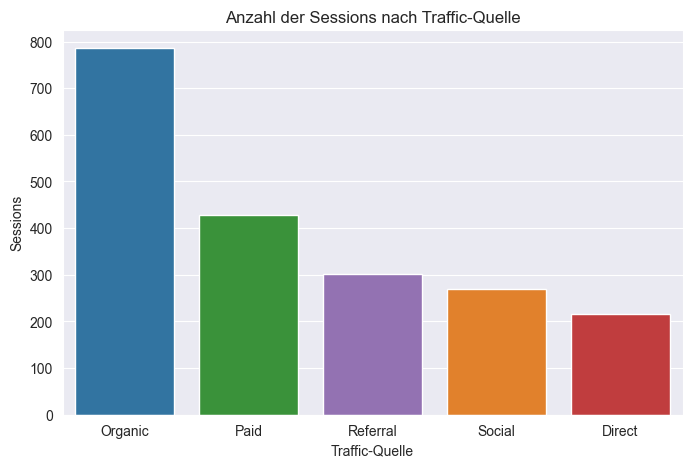

In [8]:
# Häufigkeitsdiagramm für die Traffic-Quelle
plt.figure(figsize=(8,5))
sns.countplot(x="Traffic Source",data=df, order=df['Traffic Source'].value_counts().index, hue= "Traffic Source")
plt.title("Anzahl der Sessions nach Traffic-Quelle")
plt.xlabel("Traffic-Quelle")
plt.ylabel("Sessions")

Text(0.5, 1.0, 'Anteile der Traffic-Quellen')

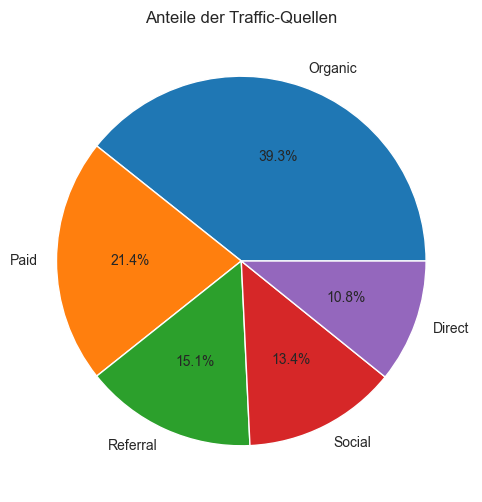

In [9]:
# Kreisdiagramm der Traffic-Quellen
df["Traffic Source"].value_counts().plot(
    kind = "pie", autopct = "%.1f%%",
    figsize=(6,6))
plt.ylabel(None)
plt.title("Anteile der Traffic-Quellen")

Text(0.5, 0, 'Seitenaufrufe')

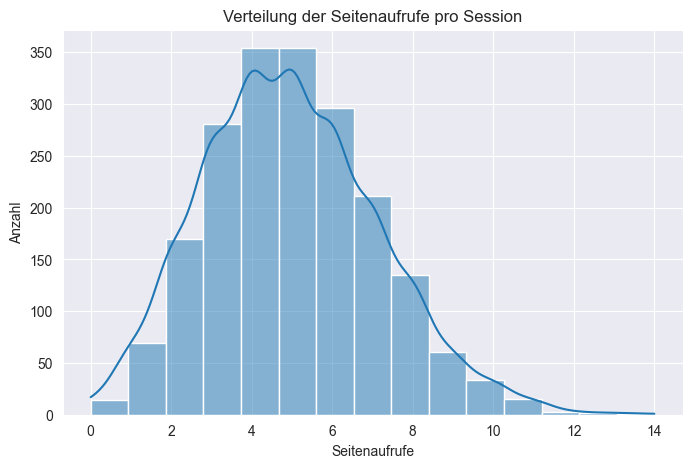

In [10]:
# Histogramm für die Verteilung der Seitenaufrufe
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = "Page Views", kde = True, bins = 15)
plt.title("Verteilung der Seitenaufrufe pro Session")
plt.ylabel("Anzahl")
plt.xlabel("Seitenaufrufe")

Text(0, 0.5, 'Verweildauer')

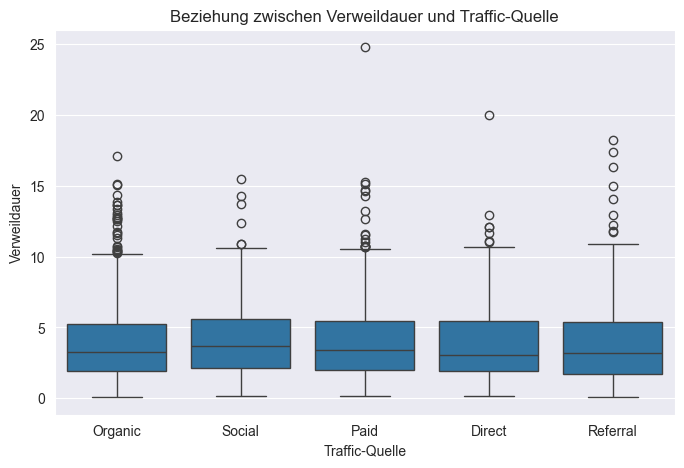

In [11]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x="Traffic Source", y="Time on Page")
plt.title("Beziehung zwischen Verweildauer und Traffic-Quelle")
plt.xlabel("Traffic-Quelle")
plt.ylabel("Verweildauer")

In [12]:
# Neuen Dataframe ohne kategorische Variabel erstellen
df_num = df.drop('Traffic Source', axis=1)

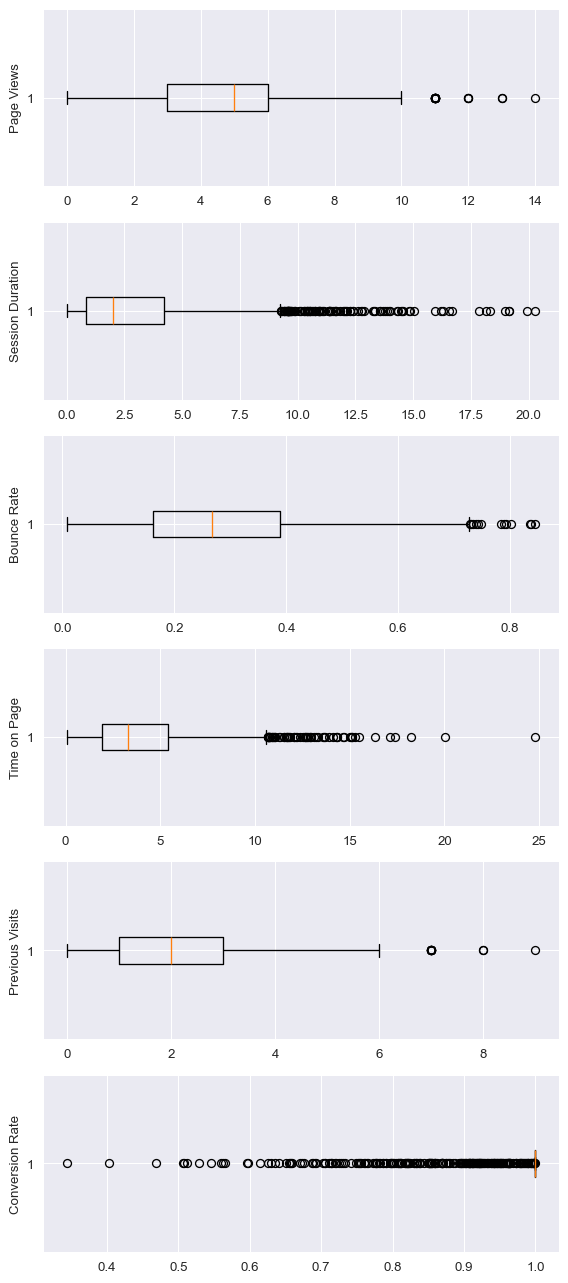

In [13]:
# Übersicht Boxplots aus numerischen Variablen erstellen
fig, axs = plt.subplots(6,1,dpi=95, figsize=(7,17))
i = 0
for col in df_num.columns:
	axs[i].boxplot(df_num[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1

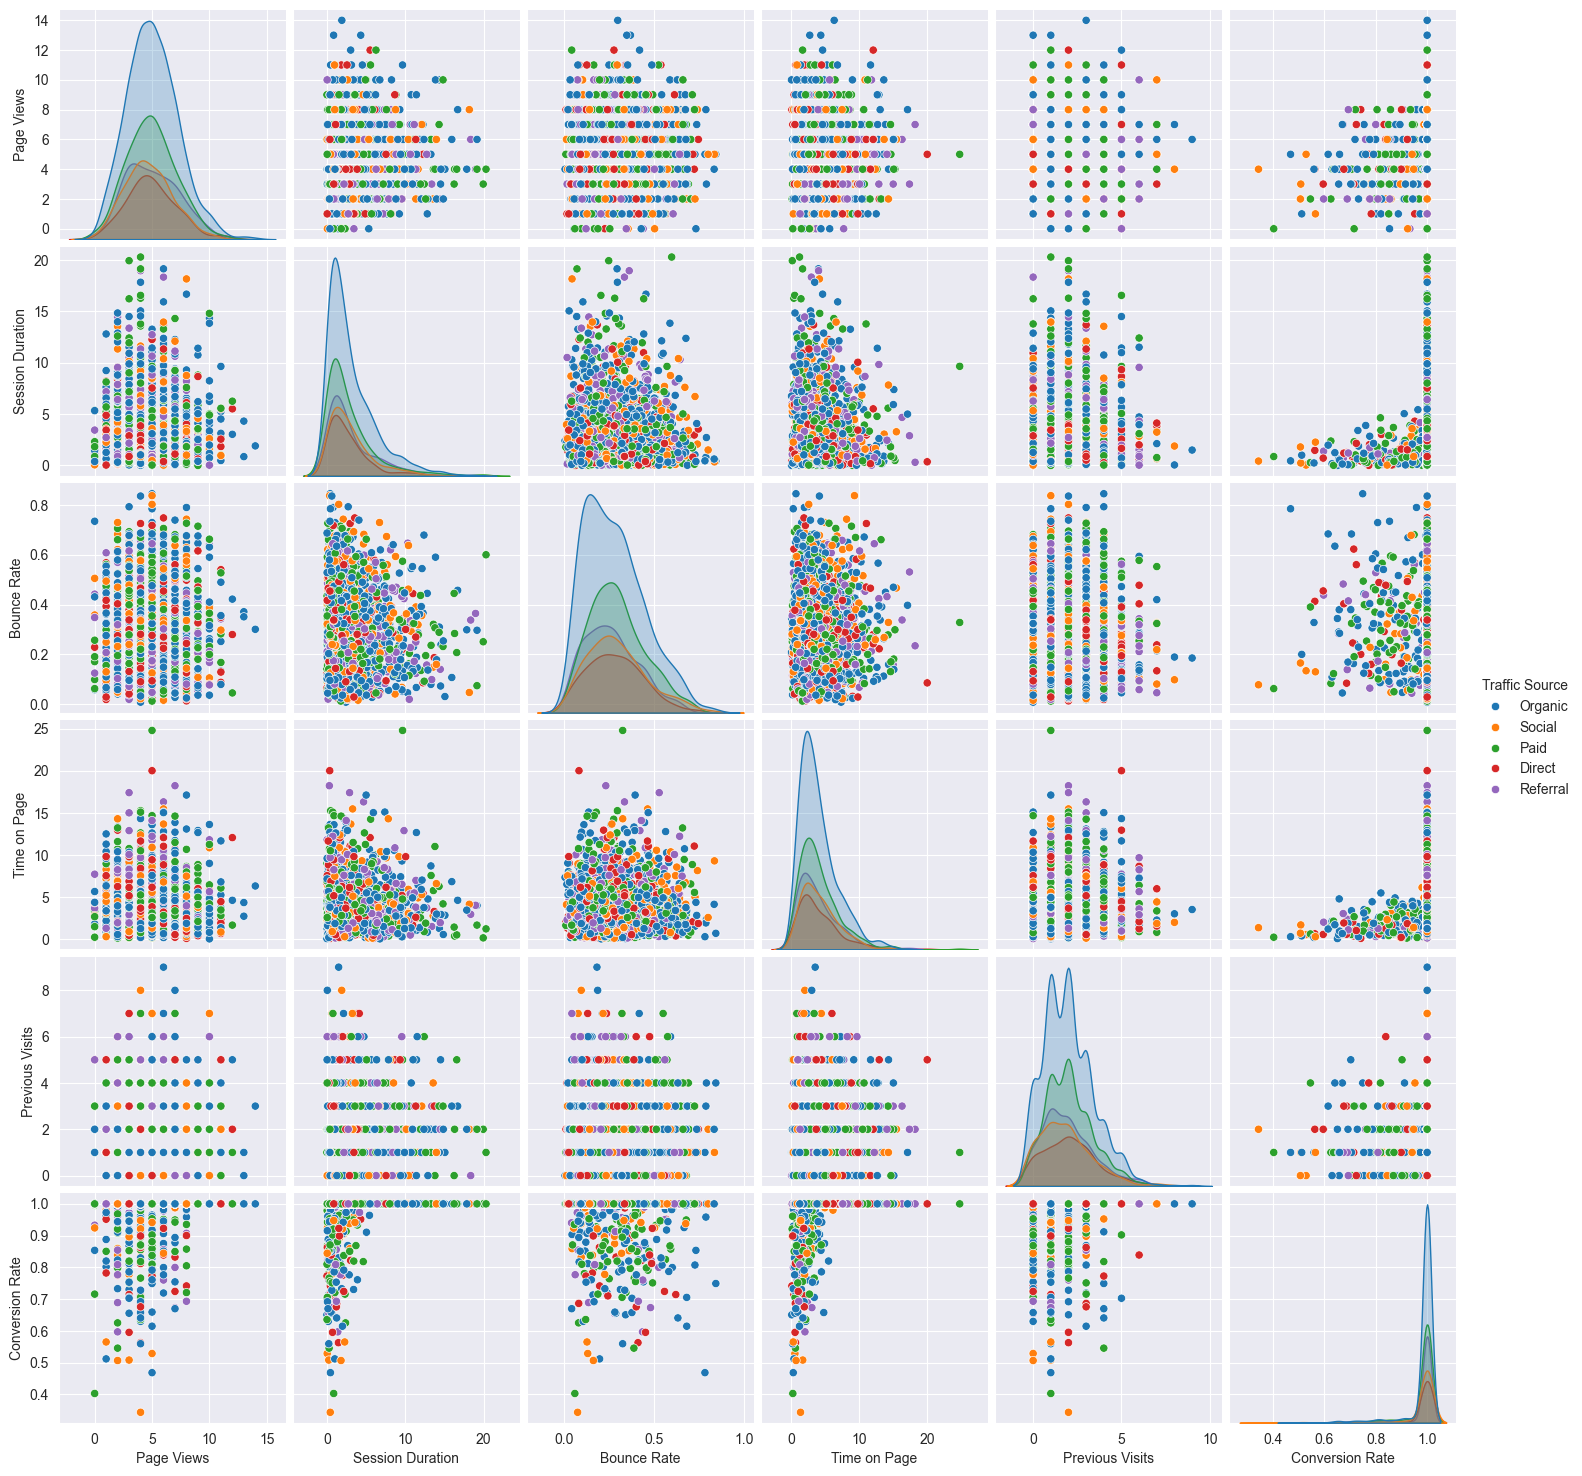

In [14]:
# Überblick über Beziehungen und Verteilungen
sns.pairplot(df, hue="Traffic Source")

<Axes: >

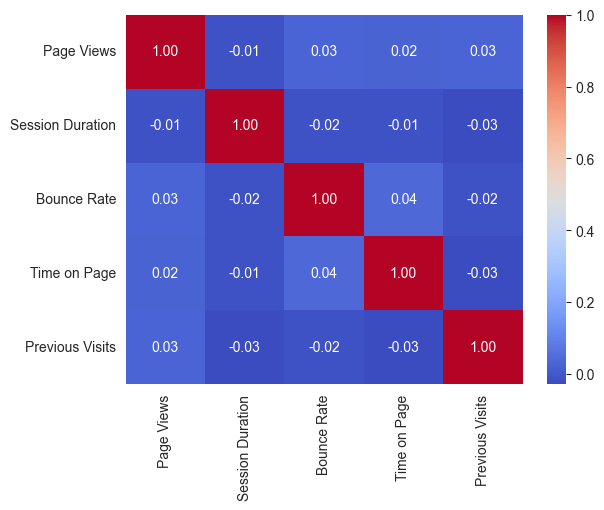

In [16]:
# Heatmap für Korrelationen
corr = df_num.drop('Conversion Rate', axis=1).corr() # Conversion Rate entfernen, da sie nahezu konstant ist (kaum Varianz).

plt.figure(dpi=100)
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt= '.2f')

## Zusammenfassung und Erkenntnisse

1. Die stärkste Quelle des Traffics ist organische Suche: Der überwiegende Teil der Nutzer erreicht die Website über Suchmaschinen.
Dies zeigt, dass Inhalte grundsätzlich über Suchbegriffe auffindbar sind und SEO derzeit der wichtigste Kanaleinstieg ist.
Strategisch bedeutet das: Suchmaschinenoptimierung ist der zentrale Hebel für Reichweite.

2. Direkter Traffic ist am geringsten ausgeprägt: Der kleinste Anteil der Sitzungen erfolgt über den Direktzugang.
Das spricht dafür, dass die Marke oder Domain nicht stark als „Anlaufadresse“ verankert ist oder dass Wiederkehrraten gering sind.
Redaktionen können hier ansetzen, indem sie Newsletter, Direktzugriffe über Apps oder interne Verlinkungsstrategien stärken.

3. Die Conversion Rate ist untypisch hoch: Die Conversion Rate liegt nahezu konstant bei 1.0.
Dies ist kein realistischer Wert und liegt an der künstlichen Generierung des Datensatzes.
Echte Rückschlüsse auf Kauf- oder Abschlussverhalten sind daher nicht möglich.

4. Zwischen den Nutzungsmetriken bestehen keine statistisch relevanten Zusammenhänge: Obwohl man typischerweise Beziehungen erwarten würde – etwa längere Sitzungen bei mehr Page Views oder geringere Bounce Rate bei steigender Verweildauer, zeigen die Korrelationen nahezu keinen Zusammenhang.
Der Datensatz spiegelt damit kein echtes Nutzerverhalten wider, sondern gleichmäßig generierte Daten.

## Empfehlungen für Redaktionsteams

1. Fokus auf Suchmaschinenoptimierung: Da organischer Traffic der dominante Kanal ist, sollte SEO strukturell weiterentwickelt werden. Dazu gehören Keyword-Analysen, Optimierung von Headlines und Inhalten sowie regelmäßige Auswertung der Ranking-Performance.

2. Nutzung zusätzlicher Kanäle zur Traffic-Stabilisierung: Eine starke Abhängigkeit von einem Kanal birgt immer Risiko.
Redaktionen sollten prüfen, wie Social Media, interne Verlinkung, Newsletter oder Kooperationen den Traffic breiter verteilen können.

3. Nutzung echter Nutzungsdaten für Engagement-Analysen: Da die in diesem Datensatz enthaltenen Session-Metriken keine realistischen Muster zeigen, sollten redaktionelle Entscheidungen auf echte interne Daten gestützt werden. Dazu zählen Scrolltiefe, Klickpfade, Leseverhalten sowie wiederkehrende Besuchsmuster.

4. Konversionen realistisch messen: Die Conversion Rate des Datensatzes liefert keinen brauchbaren Wert.
Für ein redaktionelles Umfeld sollten daher echte Konversionsziele definiert und überwacht werden. Beispielsweise Newsletter-Anmeldungen, Abos, Artikelaufrufe oder Verweildauer.